In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#read oil csv
oil = pd.read_csv("data/Crude_Oil_Prices.csv")
oil = oil.filter(["Month","Year","Crude Oil Domestic First Purchase Price (Dollars per Barrel)","M/M Change"])
oil= oil.rename(columns={"Crude Oil Domestic First Purchase Price (Dollars per Barrel)":'Crude_Oil_Price'})
oil = oil.dropna()
oil = oil[oil["Year"]>=1978]
oil['date'] = pd.to_datetime(oil[['Year', 'Month']].assign(DAY=1))
oil['month_year'] = oil['date'].dt.strftime('%m-%Y')
oil['Crude_Oil_Price'] = oil.Crude_Oil_Price.astype(float)
oil

,Month,Year,Crude_Oil_Price,M/M Change,date,month_year
75,1,1978.0,8.71,-0.1,1978-01-01,01-1978
76,2,1978.0,8.86,0.15,1978-02-01,02-1978
77,3,1978.0,8.80,-0.06,1978-03-01,03-1978
78,4,1978.0,8.82,0.02,1978-04-01,04-1978
79,5,1978.0,8.81,-0.01,1978-05-01,05-1978
...,...,...,...,...,...,...
575,9,2019.0,55.07,1.44,2019-09-01,09-2019
576,10,2019.0,53.14,-1.93,2019-10-01,10-2019
577,11,2019.0,54.96,1.82,2019-11-01,11-2019
578,12,2019.0,58.41,3.45,2019-12-01,12-2019


In [3]:
#read gas csv
gas = pd.read_csv("data/national_fuel_avgs.csv")
gas = gas.dropna()
gas['date'] = pd.to_datetime(gas[['Year', 'Month']].assign(DAY=1))
gas['month_year'] = gas['date'].dt.strftime('%m-%Y')
gas

,Year,Month,Gas Monthly Avg,date,month_year
0,2000,1,1.27880,2000-01-01,01-2000
1,2000,2,1.37050,2000-02-01,02-2000
2,2000,3,1.49825,2000-03-01,03-2000
3,2000,4,1.43650,2000-04-01,04-2000
4,2000,5,1.45640,2000-05-01,05-2000
...,...,...,...,...,...
240,2020,1,2.45900,2020-01-01,01-2020
241,2020,2,2.34800,2020-02-01,02-2020
242,2020,3,2.12560,2020-03-01,03-2020
243,2020,4,1.72100,2020-04-01,04-2020


In [4]:
merge = pd.merge(gas, oil, on="month_year")
merge = merge.dropna()
merge = merge.drop(columns=['date_x', 'date_y', 'Month_y','Year_y', 'Month_x','Year_x'])
merge.dtypes

Gas Monthly Avg    float64
month_year          object
Crude_Oil_Price    float64
M/M Change          object
dtype: object

C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(50, 1, 'y =0.03x + 0.87')

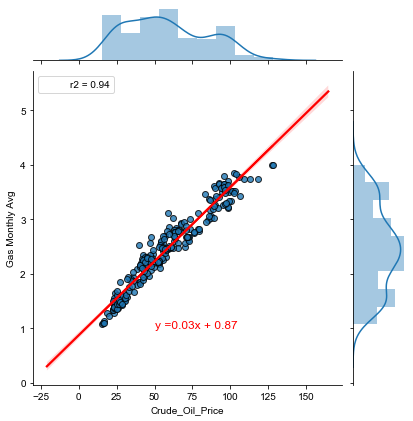

In [5]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Gas Monthly Avg", x="Crude_Oil_Price", data=merge, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = merge["Crude_Oil_Price"]
y_values = merge["Gas Monthly Avg"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
#fig.savefig("Gas vs first.png", dpi=200)

In [6]:
#read economic csv
econ = pd.read_csv("data/inflation_recession_ue.csv")
econ = econ.dropna()
econ['date'] = pd.to_datetime(econ[['Year', 'Month']].assign(DAY=1))
econ['month_year'] = econ['date'].dt.strftime('%m-%Y')
econ

,Month,Year,Recession,Adj Month,Adj Year,Unemployment,UE M/M,Inflation Rate,Inflation M/M,GDP (Trillion),GDP Rate M/M,Soybean,Wheat,Car Sales (thousands),date,month_year
169,2,1992,0,1,1992,7.4,0.1,2.8,0.2,9.480,-5.00%,211.159575,177.130600,988.500,1992-02-01,02-1992
170,3,1992,0,2,1992,7.4,0.0,3.2,0.4,9.521,5.30%,216.143437,169.350739,1128.400,1992-03-01,03-1992
171,4,1992,0,3,1992,7.4,0.0,3.2,0.0,9.600,10.40%,211.297377,159.931198,1144.900,1992-04-01,04-1992
172,5,1992,0,4,1992,7.6,0.2,3.0,-0.2,9.606,0.80%,220.369385,149.689117,1169.700,1992-05-01,05-1992
173,6,1992,0,5,1992,7.8,0.2,3.1,0.1,9.589,-2.10%,224.388628,148.665726,1297.000,1992-06-01,06-1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,11,2019,0,10,2019,3.5,-0.1,2.1,0.3,19.190,1.90%,332.957630,157.528264,1438.444,2019-11-01,11-2019
503,12,2019,0,11,2019,3.5,0.0,2.3,0.2,19.220,1.90%,334.949445,165.254641,1558.430,2019-12-01,12-2019
504,1,2020,0,12,2019,3.6,0.1,2.5,0.2,19.260,2.50%,337.079705,178.241777,1167.861,2020-01-01,01-2020
505,2,2020,0,1,2020,3.5,-0.1,2.3,-0.2,19.250,-0.60%,325.428315,172.231103,1383.188,2020-02-01,02-2020


In [7]:
merge2 = pd.merge(econ, oil, on="month_year")
merge2 = merge2.dropna()
merge2 = merge2.drop(columns=['date_x', 'date_y', 'Month_y','Year_y', 'Month_x','Year_x'])
merge2

,Recession,Adj Month,Adj Year,Unemployment,UE M/M,Inflation Rate,Inflation M/M,GDP (Trillion),GDP Rate M/M,Soybean,Wheat,Car Sales (thousands),month_year,Crude_Oil_Price,M/M Change
0,0,1,1992,7.4,0.1,2.8,0.2,9.480,-5.00%,211.159575,177.130600,988.500,02-1992,14.04,0.05
1,0,2,1992,7.4,0.0,3.2,0.4,9.521,5.30%,216.143437,169.350739,1128.400,03-1992,14.12,0.08
2,0,3,1992,7.4,0.0,3.2,0.0,9.600,10.40%,211.297377,159.931198,1144.900,04-1992,15.36,1.24
3,0,4,1992,7.6,0.2,3.0,-0.2,9.606,0.80%,220.369385,149.689117,1169.700,05-1992,16.38,1.02
4,0,5,1992,7.8,0.2,3.1,0.1,9.589,-2.10%,224.388628,148.665726,1297.000,06-1992,17.96,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0,8,2019,3.5,-0.2,1.7,0.0,19.090,-1.20%,322.453525,146.570486,1315.678,09-2019,55.07,1.44
332,0,9,2019,3.6,0.1,1.8,0.1,19.160,4.50%,339.871237,153.221090,1380.174,10-2019,53.14,-1.93
333,0,10,2019,3.5,-0.1,2.1,0.3,19.190,1.90%,332.957630,157.528264,1438.444,11-2019,54.96,1.82
334,0,11,2019,3.5,0.0,2.3,0.2,19.220,1.90%,334.949445,165.254641,1558.430,12-2019,58.41,3.45


Text(50, 1, 'y =0.06x + 11.6')

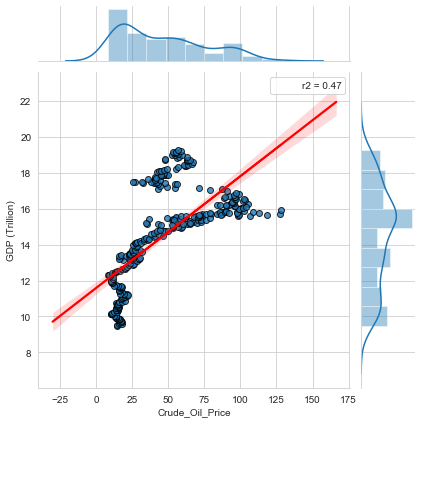

In [8]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="GDP (Trillion)", x="Crude_Oil_Price", data=merge2, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = merge2["Crude_Oil_Price"]
y_values = merge2["GDP (Trillion)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
#fig.savefig("Gas vs ue.png", dpi=200)

In [13]:
#read plane csv
total = pd.read_csv("data/total_data.csv", index_col=0)
total = total.dropna()
total = total.drop(columns=['Crude_Oil_Price'])
total.head(5)

,date,month_year,Monthly Gold AVG,Dow Price
0,1985-01-01,01-1985,306.7,1289.090007
1,1985-02-01,02-1985,287.8,1283.232101
2,1985-03-01,03-1985,329.3,1268.829997
3,1985-04-01,04-1985,321.4,1266.358114
4,1985-05-01,05-1985,314.0,1279.397738


Text(50, 1, 'y =10.56x + 2543.27')

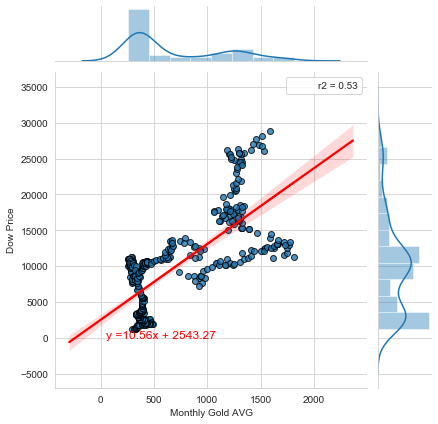

In [10]:
#Scatter and regression on the entire sample to show singular trend and R-Square  
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(y="Dow Price", x="Monthly Gold AVG", data=total, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

sns.set_style('whitegrid')

#Linear Regression
x_values = total["Monthly Gold AVG"]
y_values = total["Dow Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1),fontsize=12,color="red")

# Save plot
#fig.savefig("Gas vs ue.png", dpi=200)

In [16]:
#Creating merge df of all data streams, gas for car df to look at car sales
merge5 = pd.merge(oil, econ, on="month_year")
merge6 = pd.merge(merge5, total, on="month_year")
merge6 = merge6.dropna()
merge6 = merge6.drop(columns=['date_x', 'date_y', 'Month_y','Year_y', 'Month_x','Year_x', 'Adj Month','Adj Year'])
merge6
#merge6.to_csv('combined_econ.csv')

,Crude_Oil_Price,M/M Change,month_year,Recession,Unemployment,UE M/M,Inflation Rate,Inflation M/M,GDP (Trillion),GDP Rate M/M,Soybean,Wheat,Car Sales (thousands),date,Monthly Gold AVG,Dow Price
0,14.04,0.05,02-1992,0,7.4,0.1,2.8,0.2,9.480,-5.00%,211.159575,177.130600,988.500,1992-02-01,353.1,3257.273707
1,14.12,0.08,03-1992,0,7.4,0.0,3.2,0.4,9.521,5.30%,216.143437,169.350739,1128.400,1992-03-01,341.7,3247.422729
2,15.36,1.24,04-1992,0,7.4,0.0,3.2,0.0,9.600,10.40%,211.297377,159.931198,1144.900,1992-04-01,336.4,3294.093355
3,16.38,1.02,05-1992,0,7.6,0.2,3.0,-0.2,9.606,0.80%,220.369385,149.689117,1169.700,1992-05-01,337.5,3376.784985
4,17.96,1.58,06-1992,0,7.8,0.2,3.1,0.1,9.589,-2.10%,224.388628,148.665726,1297.000,1992-06-01,343.4,3337.789085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,55.07,1.44,09-2019,0,3.5,-0.2,1.7,0.0,19.090,-1.20%,322.453525,146.570486,1315.678,2019-09-01,1485.3,26900.213960
332,53.14,-1.93,10-2019,0,3.6,0.1,1.8,0.1,19.160,4.50%,339.871237,153.221090,1380.174,2019-10-01,1511.0,26736.797720
333,54.96,1.82,11-2019,0,3.5,-0.1,2.1,0.3,19.190,1.90%,332.957630,157.528264,1438.444,2019-11-01,1460.2,27797.046090
334,58.41,3.45,12-2019,0,3.5,0.0,2.3,0.2,19.220,1.90%,334.949445,165.254641,1558.430,2019-12-01,1514.8,28167.005770


# Creating Test and Training Data for Linear Regression and ML

## Creating X and Y variables 

In [93]:
#X = merge6[['Wheat', 'Crude_Oil_Price', 'Inflation Rate']]
#y = merge6['Unemployment'].values.reshape(-1,1)
# 336 rows - 3 x's MSE: 0.6073076133235344, R2: 0.012212547654666063

#X = merge6[['Monthly Gold AVG', 'Dow Price', 'Wheat', 'Crude_Oil_Price', 'Inflation Rate']]
#y = merge6['Unemployment'].values.reshape(-1,1)
# 336 rows - 5 x's - 0.11700573638921992, R2: 0.8096898577885514

#X = merge6[['Monthly Gold AVG', 'GDP (Trillion)', 'Wheat', 'Crude_Oil_Price', 'Inflation Rate']]
#y = merge6['Unemployment'].values.reshape(-1,1)
# 336 rows - 5 x's - MSE: 0.20600753423258822, R2: 0.6649281962893074

#X = merge6[['Dow Price', 'GDP (Trillion)', 'Wheat', 'Crude_Oil_Price', 'Inflation Rate']]
#y = merge6['Unemployment'].values.reshape(-1,1)
# 336 rows - 5 x's - MSE: 0.24011606892999743, R2: 0.6094505736598059

X = merge6[['Car Sales (thousands)', 'Monthly Gold AVG', 'Dow Price', 'GDP (Trillion)', 'Wheat', 'Crude_Oil_Price', 'Inflation Rate']]
y = merge6['Unemployment'].values.reshape(-1,1)
#336 rows -7 x's - MSE: 0.11180104070376862, R2: 0.8181553091983065

print(X.shape,y.shape)

(336, 7) (336, 1)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

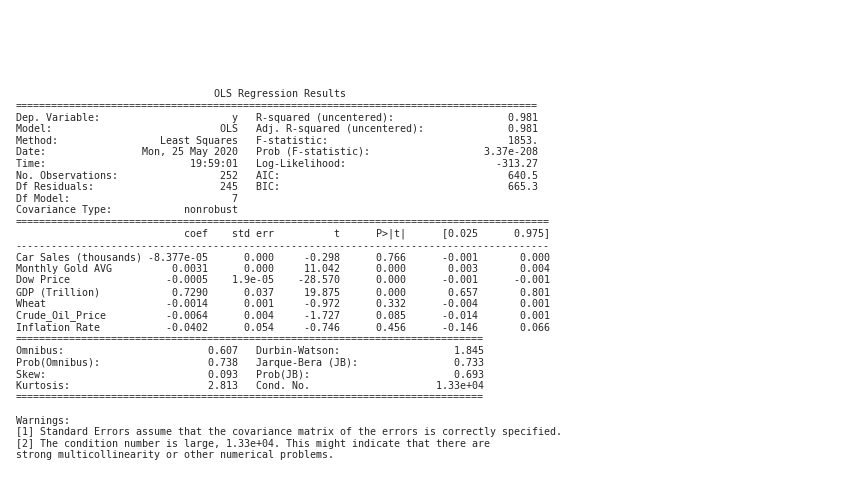

In [95]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_test)
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.show()

#### Splitting and Training Data

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [97]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [98]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [99]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

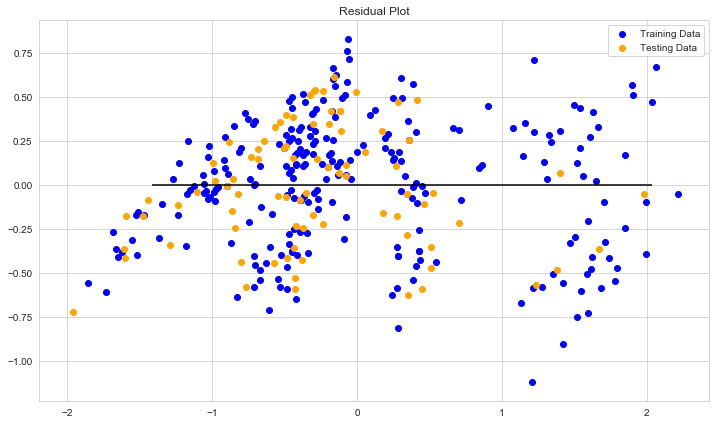

In [100]:
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [101]:
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11180104070376862, R2: 0.8181553091983065


In [102]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11460917653695535, R2: 0.813587868778248


In [103]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11180371951843064, R2: 0.8181509520991161


In [104]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11466664451326937, R2: 0.8134943969615454
